In [34]:
import xlrd
import xlwt
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import neurolab as nl

import pandas as pd
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import time

data = pd.read_excel('data1.xlsx')

del data['FROM DATE']
del data['TO DATE']

del data['VWS']
del data['TEMP']
del data['AT']
names = data.columns




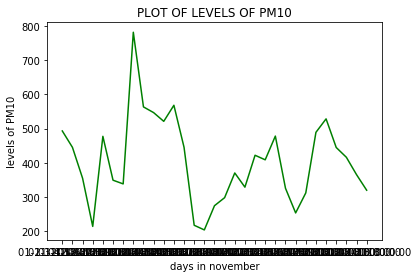

In [37]:
               
data = pd.read_excel('data1.xlsx')
fd=list(data['FROM DATE'])
pm=list(data['PM10'])
plt.plot(fd, pm, color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('days in november')
plt.ylabel('levels of PM10')
plt.title('PLOT OF LEVELS OF PM10')
plt.show()


Linear model R2 value for  BENZENE  and  TOLUENE  :  0.8176179835677296 



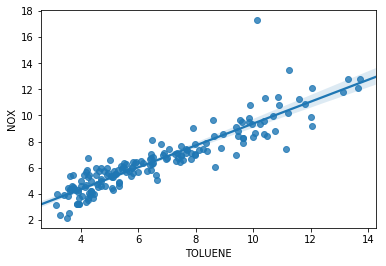

Scores from cross validation: [0.73300085 0.82281981 0.84113478 0.89587442 0.86982661 0.84288755
 0.87361323 0.83562003 0.89168104 0.88614707]


Mean: 0.8492605390850343 

Standard deviation: 0.04566959683792611
#########################################################################################



Linear model R2 value for  BENZENE  and  NOX  :  0.7348335858686958 



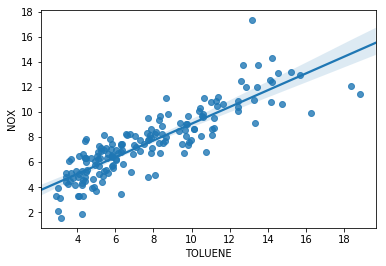

Scores from cross validation: [0.62248177 0.67006378 0.69618388 0.78836117 0.78198392 0.72072513
 0.79546237 0.7139583  0.7788766  0.82954362]


Mean: 0.7397640533160024 

Standard deviation: 0.06194963422000329
#########################################################################################



Linear model R2 value for  BENZENE  and  CO  :  0.8143077346985595 



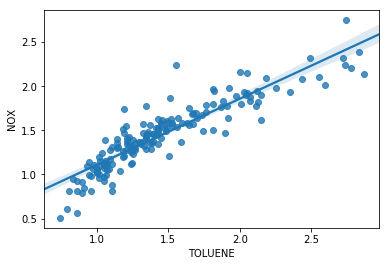

Scores from cross validation: [0.5521904  0.71549029 0.86028693 0.86945061 0.81538275 0.42589965
 0.45604983 0.46651725 0.84423513 0.83320185]


Mean: 0.6838704687085431 

Standard deviation: 0.17745646982861152
#########################################################################################



Linear model R2 value for  TOLUENE  and  NOX  :  0.7571186098932079 



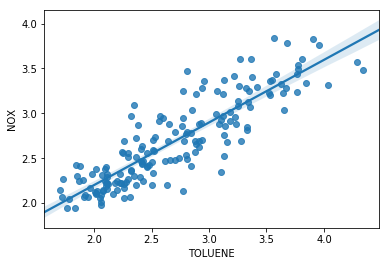

Scores from cross validation: [0.65094959 0.6619149  0.64839459 0.70775771 0.80629543 0.81001456
 0.79731649 0.67950749 0.77170168 0.75589908]


Mean: 0.7289751531680901 

Standard deviation: 0.06304151571464923
#########################################################################################



Linear model R2 value for  TOLUENE  and  CO  :  0.7883245399481272 



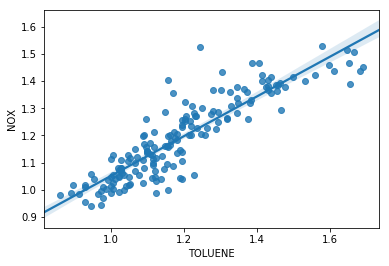

Scores from cross validation: [0.79090165 0.81851605 0.84005439 0.82953031 0.79969067 0.31551629
 0.3573407  0.15237641 0.83824551 0.84510607]


Mean: 0.6587278055171779 

Standard deviation: 0.25630237884331014
#########################################################################################



Linear model R2 value for  NOX  and  CO  :  0.7465323346390835 



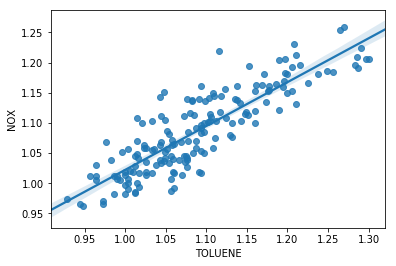

Scores from cross validation: [0.62966926 0.67099565 0.77510037 0.72210085 0.76735423 0.31614615
 0.22709787 0.15646837 0.76778404 0.76409527]


Mean: 0.5796812066678888 

Standard deviation: 0.23383677379542211
#########################################################################################




In [38]:
ls = ['BENZENE','TOLUENE','NOX','CO'] 
grant =[]


train1 = pd.read_excel('dt2_train.xlsx')
test1 = pd.read_excel('dt2_test.xlsx')
# print(train)

train = train1[['BENZENE','TOLUENE','NOX','CO']].copy()
test = test1[['BENZENE','TOLUENE','NOX','CO']].copy()



for i in ls:
    for j in ls:

        
        if not j in grant:
            if (i!=j):
                grant.append(i)
                d1 = i
                d2 = j

                train[d1] = train[d1].apply(np.sqrt)
                train[d2] = train[d2].apply(np.sqrt)
                test[d1] = test[d1].apply(np.sqrt)
                test[d2] = test[d2].apply(np.sqrt)

                x_train = train[d1]
                y_train = train[d2]
                x_test = test[d1]
                y_test = test[d2]

                x_train = np.array(x_train)
                y_train = np.array(y_train)
                x_test = np.array(x_test)
                y_test = np.array(y_test)

                x_train = x_train.reshape(-1, 1)
                x_test = x_test.reshape(-1, 1)


                clf = LinearRegression(normalize=True)
                clf.fit(x_train, y_train)
                y_pred = clf.predict(x_test)
                r2 = r2_score(y_test, y_pred)


                print('\nLinear model R2 value for ',i,' and ',j,' : ', r2,'\n')

                plt.clf()
                plt.cla()
                sns.regplot(y_test, y_pred)
                plt.xlabel(ls[n1])
                plt.ylabel(ls[n2])
                plt.show()
                


                scores = cross_val_score(clf, x_train, y_train, cv=10)


                print("Scores from cross validation:", scores)
                print ('\n')
                print("Mean:", scores.mean(),'\n')
                print("Standard deviation:", scores.std())
                print('#########################################################################################\n\n')

